# Document Loading
Course Source: https://www.deeplearning.ai/short-courses/langchain-chat-with-your-data/

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

In [2]:
import os
import sys

import openai
from IPython.display import Image

os.environ['OPENAI_API_KEY'] = "Replace with Your API"
openai.api_key  = os.environ['OPENAI_API_KEY']

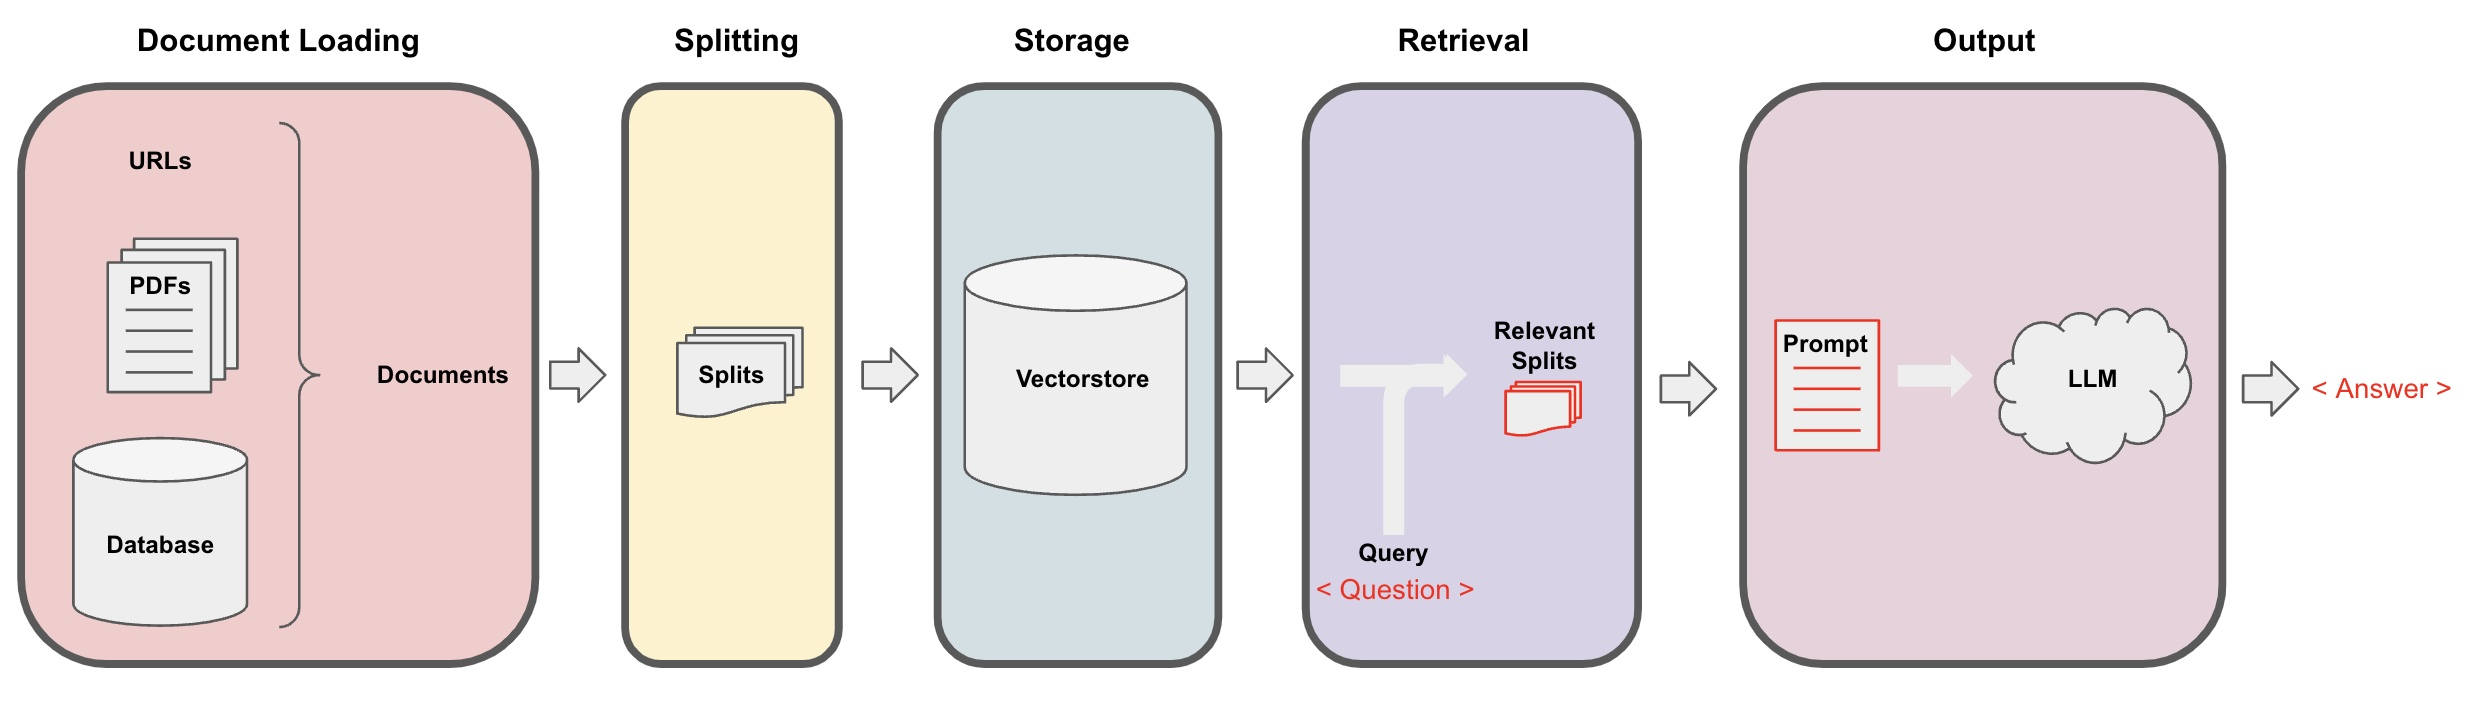

In [3]:
Image("../images/overview.jpeg")

## PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course! These documents are the result of automated transcription so words and sentences are sometimes split unexpectedly.

In [19]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("./docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [20]:
len(pages)

22

In [21]:
page = pages[0]

In [23]:
print(page.page_content[:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [24]:
page.metadata

{'source': './docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [25]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
# ! pip install yt_dlp
# ! pip install pydub

**Note**: This can take several minutes to complete.

In [ ]:
url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

In [ ]:
docs[0].page_content[0:500]

## URLs

In [35]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://en.wikipedia.org/wiki/Abnormal_grain_growth")

In [27]:
docs = loader.load()

In [33]:
print(docs[0].page_content[:500])





Abnormal grain growth - Wikipedia




































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out edit


## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

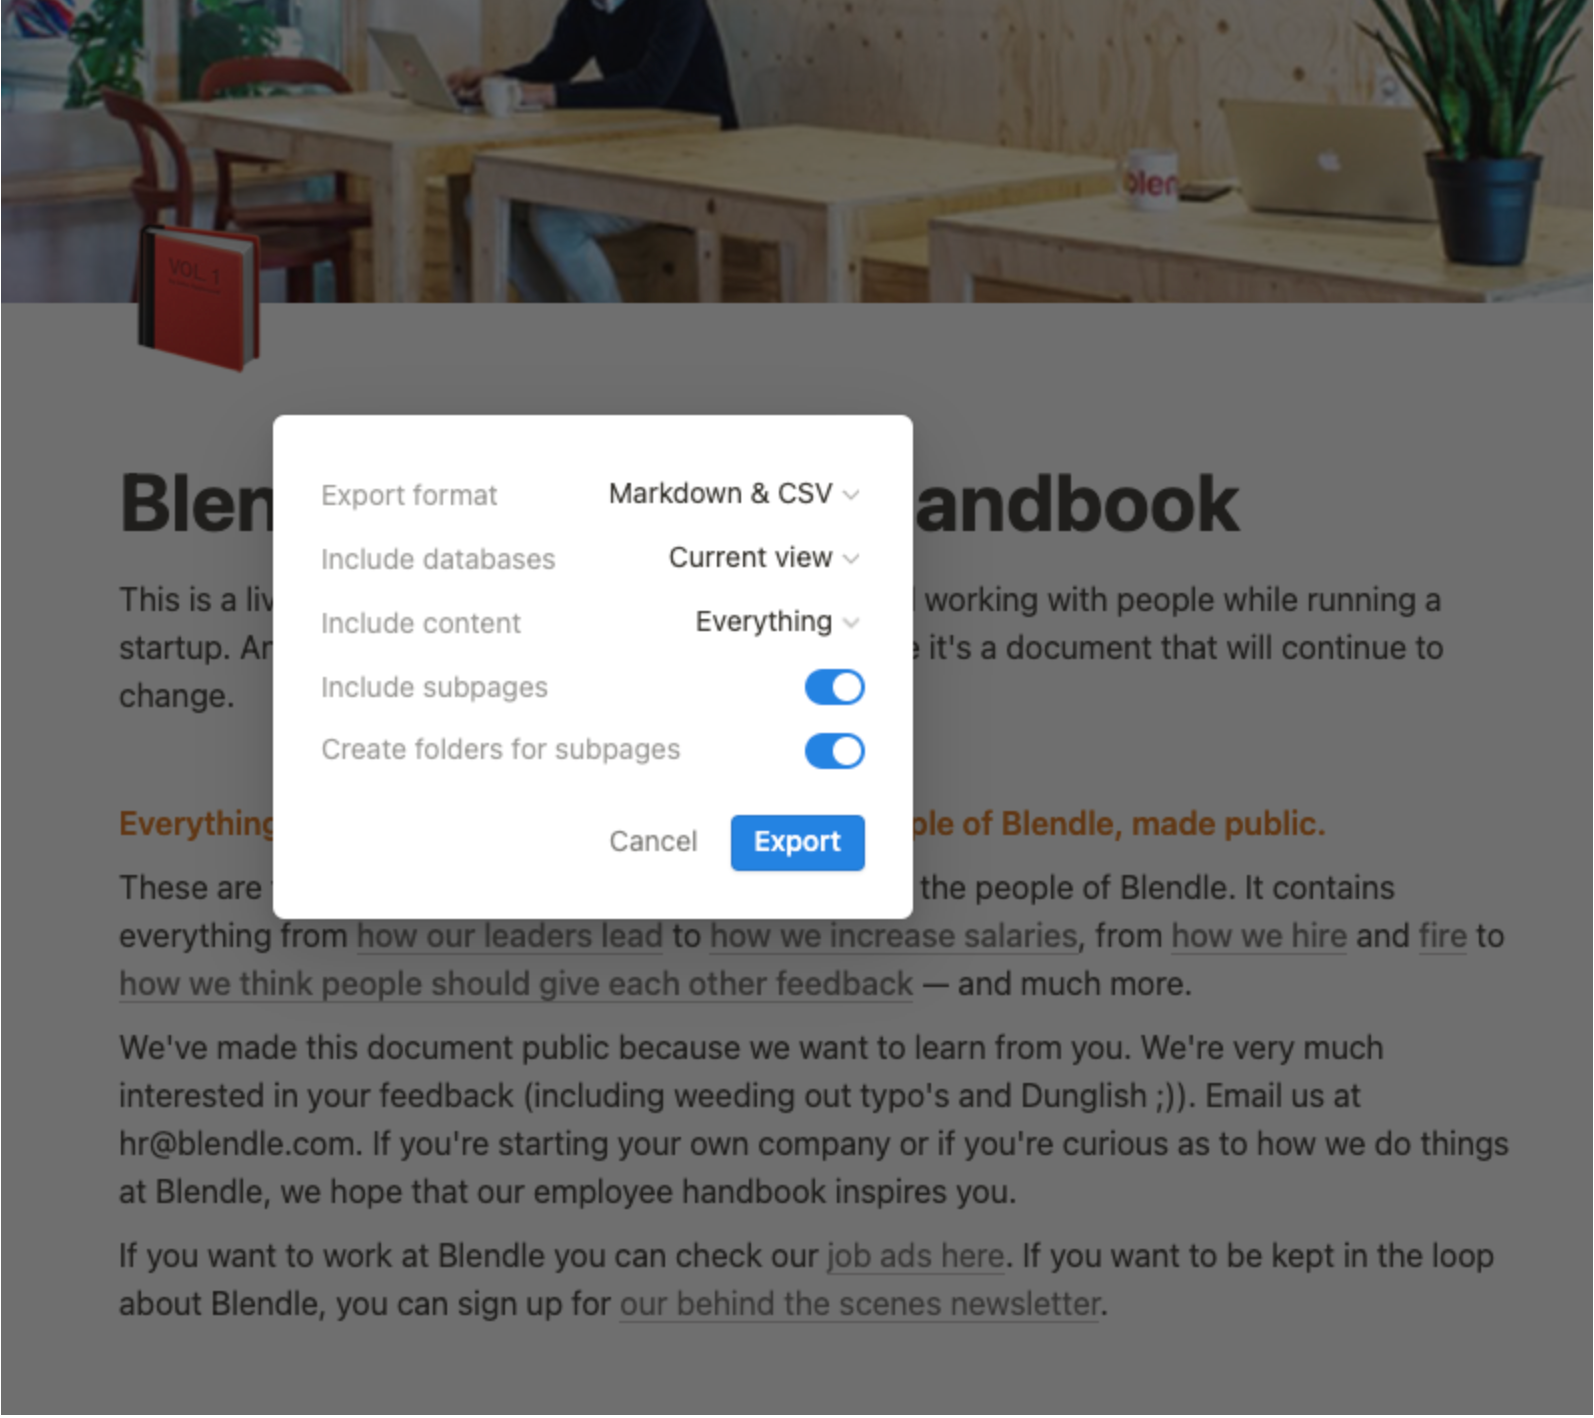

In [41]:
Image("./images/notion.jpeg")

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [ ]:
print(docs[0].page_content[0:200])

In [ ]:
docs[0].metadata